In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
rows, columns = data.shape
print(f"Number of rows:{rows}")
print(f"Number of rows:{columns}")

Number of rows:768
Number of rows:9


# Removing NA values

In [5]:
df=data.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# To identify outliers

In [6]:
from scipy.stats import zscore
z_score= zscore(data['Insulin'])
outliers = data[np.abs(z_score)>3]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
370,3,173,82,48,465,38.4,2.137,25,1


In [7]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
numeric_df = data.select_dtypes(include='number')
summary = pd.DataFrame({
    'Mean':numeric_df.mean(),
    'Media': numeric_df.median(),
    'Mode':numeric_df.mode().iloc[0],
    'Std dev': numeric_df.std(),
    'Maximum':numeric_df.max(),
    'Minimum':numeric_df.min()
})
print(summary)

                                Mean     Media    Mode     Std dev  Maximum  \
Pregnancies                 3.845052    3.0000   1.000    3.369578    17.00   
Glucose                   120.894531  117.0000  99.000   31.972618   199.00   
BloodPressure              69.105469   72.0000  70.000   19.355807   122.00   
SkinThickness              20.536458   23.0000   0.000   15.952218    99.00   
Insulin                    79.799479   30.5000   0.000  115.244002   846.00   
BMI                        31.992578   32.0000  32.000    7.884160    67.10   
DiabetesPedigreeFunction    0.471876    0.3725   0.254    0.331329     2.42   
Age                        33.240885   29.0000  22.000   11.760232    81.00   
Outcome                     0.348958    0.0000   0.000    0.476951     1.00   

                          Minimum  
Pregnancies                 0.000  
Glucose                     0.000  
BloodPressure               0.000  
SkinThickness               0.000  
Insulin                     0

In [13]:
categorical_cols=df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nRelative frequency for {col}:")
    print(df[col].value_counts(normalize=True)*100)

In [14]:
target_columns=['BloodPressure', 'SkinThickness', 'Insulin','BMI']
data[target_columns]= data[target_columns].replace(0, np.nan)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
df= data.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0


In [16]:
numeric_df=df.select_dtypes(include='number')
summary= pd.DataFrame({
    'Mean':numeric_df.mean(),
    'Median':numeric_df.median(),
    'Mode':numeric_df.mode().iloc[0],
    'Std Dev':numeric_df.std(),
    'Maximum':numeric_df.max(),
    'Minimum':numeric_df.min(),
})
print(summary)

                                Mean   Median     Mode     Std Dev  Maximum  \
Pregnancies                 3.295165    2.000    1.000    3.209425    17.00   
Glucose                   122.315522  119.000  100.000   31.435992   198.00   
BloodPressure              70.671756   70.000   70.000   12.481277   110.00   
SkinThickness              29.122137   29.000   32.000   10.513128    63.00   
Insulin                   155.717557  125.000  105.000  118.879630   846.00   
BMI                        33.072519   33.200   32.000    7.023947    67.10   
DiabetesPedigreeFunction    0.522476    0.447    0.299    0.345232     2.42   
Age                        30.839695   27.000   22.000   10.199903    81.00   
Outcome                     0.330789    0.000    0.000    0.471097     1.00   

                          Minimum  
Pregnancies                 0.000  
Glucose                     0.000  
BloodPressure              24.000  
SkinThickness               7.000  
Insulin                    14

In [17]:
categorical_cols=df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nRelative frequency for {col}:")
    print(df[col].value_counts(normalize=True)*100)

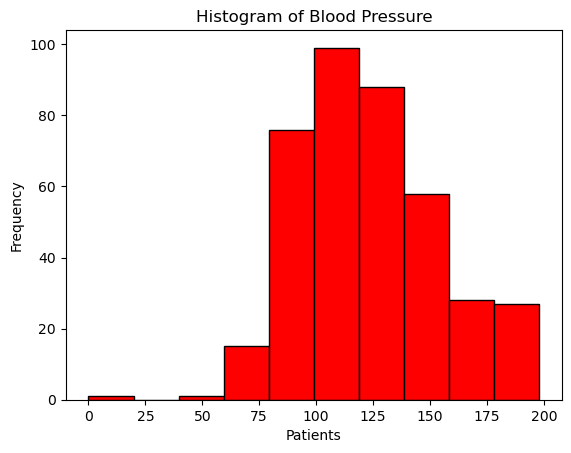

In [38]:
import matplotlib.pyplot as plt
plt.hist(df['Glucose'], bins=10, edgecolor='black',color='red')
plt.title('Histogram of Blood Pressure')
plt.xlabel("Patients")
plt.ylabel("Frequency")
plt.show()

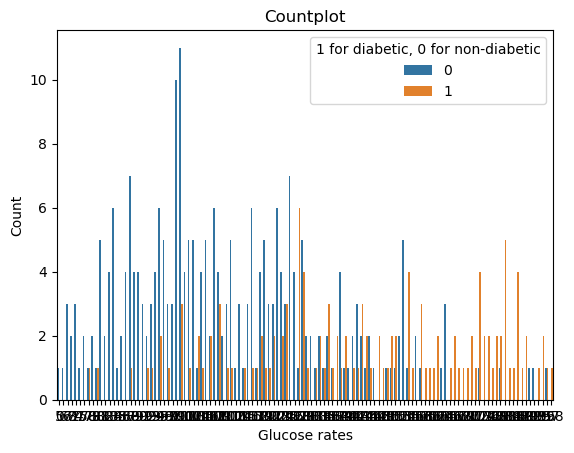

In [39]:
import seaborn as sns
sns.countplot(x='Glucose', hue='Outcome', data=df)
plt.title('Countplot')
plt.xlabel('Glucose rates')
plt.ylabel('Count')
plt.legend(title='1 for diabetic, 0 for non-diabetic')
plt.show()

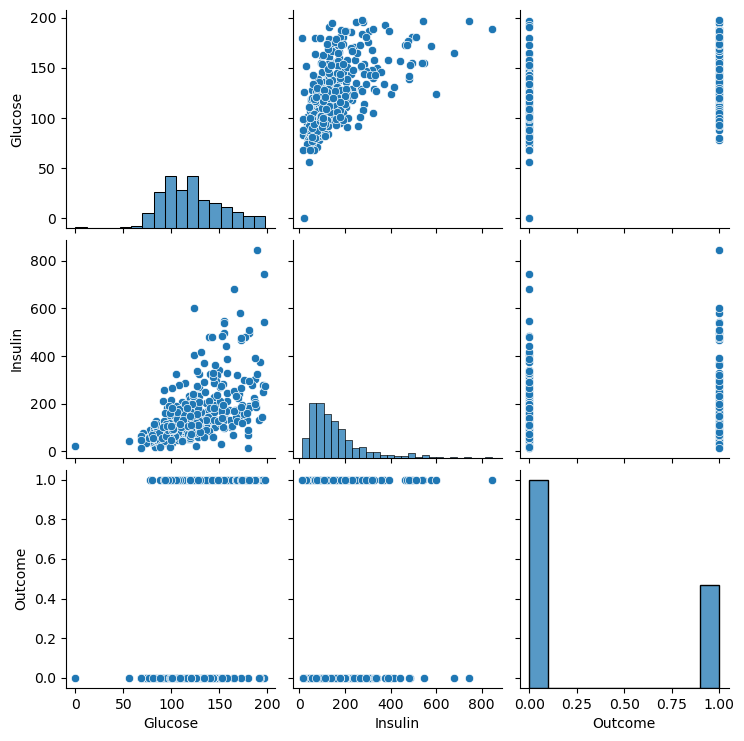

In [40]:
target_columns=['Glucose','Insulin','Outcome']
sns.pairplot(df[target_columns])
plt.show()

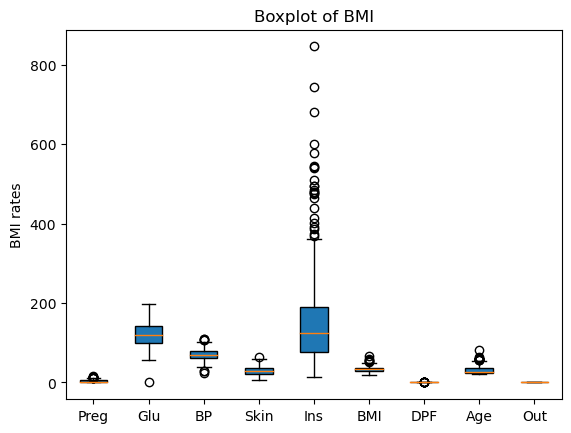

In [48]:
new_data = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
renamed_cols = ['Preg', 'Glu', 'BP', 'Skin', 'Ins', 'BMI', 'DPF', 'Age', 'Out']
plt.boxplot([new_data[col].dropna() for col in new_data.columns], labels=renamed_cols, patch_artist=True)
plt.title('Boxplot of BMI')
plt.ylabel('BMI rates')
plt.show()

          Glucose   Insulin   Outcome
Glucose  1.000000  0.580060  0.512289
Insulin  0.580060  1.000000  0.302763
Outcome  0.512289  0.302763  1.000000


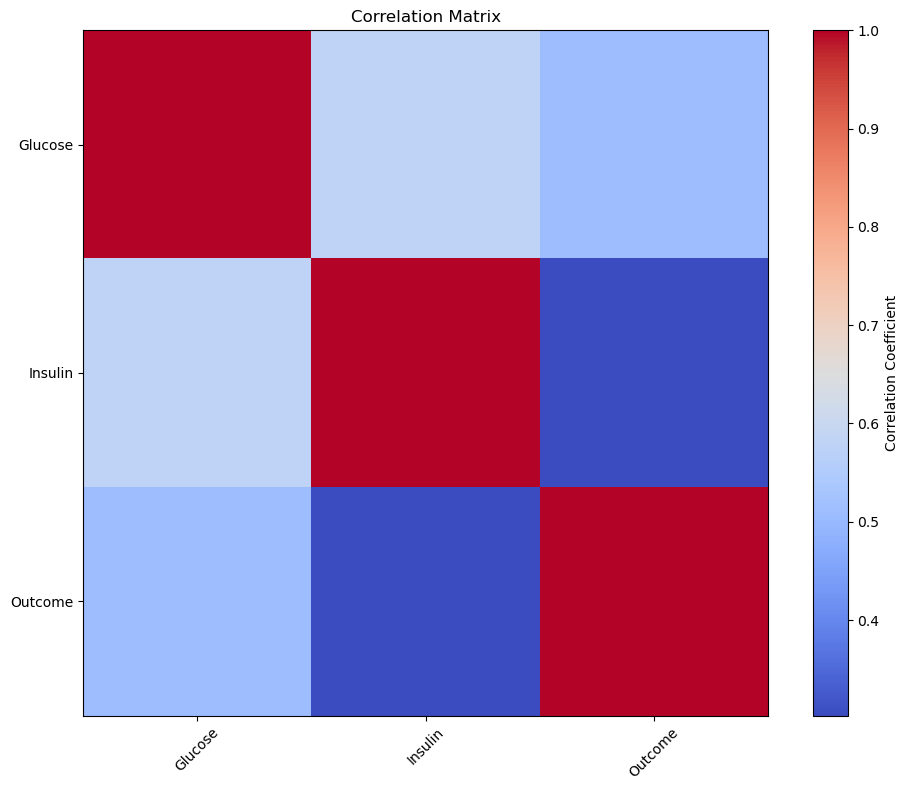

In [41]:
cols=['Glucose', 'Insulin', 'Outcome']
corr_matrix= df[cols].corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

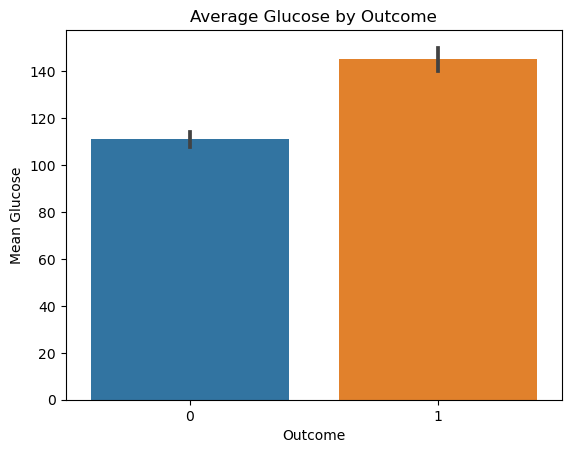

In [42]:
# Example: Average Glucose level per Outcome category
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.title('Average Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Mean Glucose')
plt.show()

In [ ]:
Insights:While the barplot shows a direct relation of Glucose causing diabetes, the correlation matrix shows that it's high insulin levels
    than glucose and countplot supports that also. 